## Exploratory Data Analysis(EDA) with Python
In this project, I explore *Global Electronics* Dataset

### 1. Introduction to EDA
Exploratory Data Analysis is step of analyzing new dataset. It is used to find the distribution of data and also provides tool to visualizing and understanding data through graphical representation.

### 2. Distribution of variable
* Univariate Distribution
* Bivariate Distribution
* Multivariate Distribution

### 3. Import Python Libraries
* *Pandas and Numpy* for data analysis process.
* *matplotlib and Seaborn* for data visualization process.

In [256]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 4.Dataset Description

* **Cutomer Dataset**
    - Contains information about the person who purchased products from Global Electronics.
    - Attributes are CutomerKey, Gender, Name, City, Statecode, State, Zipcode, Country, Continent, Birthday.
* **Product Dataset**
    - Contains Detains about the products available in Global Electronics.
    - Attributes are ProductKey, ProductName, Brand, Color, UnitCost, UnitPrice, SubcategoryKey, Subcategory, CategoryKey, Category.
    - All prices are in USD.
* **Sales Dataset**
    - Keeps all the records of sales from year 2016 to 2022
    - Attributes are OrderNum, Line Item, OrderDate, deliveryDate, CustomerKey, ProductKEy, StoreKey, Quantity, Currency Code
* **Stores Dataset**
    - Keeps the records of the stores among various countries
    - Attributes are StoreKey, Country, State, Square Metre, Opendate

## 5.Load the dataset

In [136]:
# Load Customer data
data_cust = pd.read_csv("C:/Users/moort/Downloads/Customers.csv", encoding='latin-1')
#Load Products data
data_prod = pd.read_csv("Products.csv")
#Load Sales Data
data_sale = pd.read_csv("Sales.csv")
#Load Store Data
data_store = pd.read_csv("Stores.csv")

## 6.Overview of dataset

#### 6.1 Overview of Customer Data

**6.1.1 shape** - Attribute to check the dimension of the data

In [178]:
data_cust.shape

(15266, 10)

**6.1.2 columns** - Attribute to check the column of the data

In [173]:
data_cust.columns

Index(['CustomerKey', 'Gender', 'Name', 'City', 'State Code', 'State',
       'Zip Code', 'Country', 'Continent', 'Birthday'],
      dtype='object')

**6.1.3 head()** - To view the top five rows of the dataset

In [170]:
data_cust.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


**6.1.4 tail()** - To view the bottom five rows of the dataset

In [166]:
data_cust.tail()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937
15265,2099937,Male,Zygmunt Kaminski,Bloomfield Township,MI,Michigan,48302,United States,North America,8/18/1965


**6.1.5 info()** - Get the information about the dataframe including index, column names and data types, memory usage

In [163]:
data_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


**6.1.6 describe()** - Statistical summary of numerical column

In [157]:
data_cust.describe()

,CustomerKey
count,1.526600e+04
mean,1.060508e+06
std,6.127097e+05
min,3.010000e+02
25%,5.140335e+05
50%,1.079244e+06
75%,1.593980e+06
max,2.099937e+06


**6.1.7 Statistical summary of text column**

In [155]:
data_cust.describe(include='object')

,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
count,15266,15266,15266,15256,15266,15266,15266,15266,15266
unique,2,15118,8258,467,512,9505,8,3,11270
top,Male,John Smith,Toronto,CA,California,90017,United States,North America,6/12/1989
freq,7748,4,204,740,715,70,6828,8381,5


## 7. Check anamolies in the customer dataset
* Statecode of *Napoli* state has NULL values
* Fill those values with the first two alphabet of the corresponding state name

In [188]:
data_cust.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [6]:
data_cust[data_cust['State'] == 'Napoli']

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,4/18/1981
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,2/24/1949
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,3/14/1936
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,8/6/1963
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1/5/1961
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,8/28/1976
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,11/13/1947
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1/13/1940
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,5/8/1977
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,3/3/2000


In [190]:
data_cust['State Code'].fillna('NA', inplace=True)

C:\Users\moort\AppData\Local\Temp\ipykernel_10624\3573115836.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cust['State Code'].fillna('NA', inplace=True)


**Calculate Age Column from the Birthday Column** by changing the format of Birthday column datatype

In [199]:
data_cust['Birthday']=pd.to_datetime(data_cust['Birthday'], format='%m/%d/%Y')

In [201]:
def calculate_age(dob):
    today = pd.Timestamp.today()
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age

In [203]:
data_cust['Age'] = data_cust['Birthday'].apply(calculate_age)

In [12]:
data_cust.head(20)

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,85
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,45
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26,77
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17,67
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19,59
5,1086,Male,Hayden Clegg,TEMPLERS,SA,South Australia,5371,Australia,Australia,1954-01-20,70
6,1133,Male,Nicholas Caffyn,JUBILEE POCKET,QLD,Queensland,4802,Australia,Australia,1969-11-22,55
7,1256,Male,Lincoln Jenks,KULLOGUM,QLD,Queensland,4660,Australia,Australia,1950-03-12,74
8,1314,Male,Isaac Israel,EDITH RIVER,NT,Northern Territory,852,Australia,Australia,1965-12-21,58
9,1568,Male,Luke Virtue,KOTTA,VIC,Victoria,3565,Australia,Australia,1975-07-25,49


## 8.Univariate Analysis

**8.1 distribution Analysis based on Gender**

In [195]:
data_cust['Gender'].describe()

count     15266
unique        2
top        Male
freq       7748
Name: Gender, dtype: object

**8.2 distribution Analysis based on Age**

In [205]:
data_cust['Age'].describe()

count    15266.000000
mean        55.708241
std         19.321794
min         22.000000
25%         39.000000
50%         56.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64

**8.3 distribution Analysis based on Continent and Country**

In [217]:
data_cust['Country'].describe()

count             15266
unique                8
top       United States
freq               6828
Name: Country, dtype: object

In [220]:
data_cust['Continent'].describe()

count             15266
unique                3
top       North America
freq               8381
Name: Continent, dtype: object

**8.4 Skewness**

In [228]:
data_cust['Age'].skew()

-0.003495076111267844

**8.5 Kurtosis**

In [253]:
data_cust['Age'].kurt()

-1.19267467084326

<Figure size 1500x800 with 0 Axes>

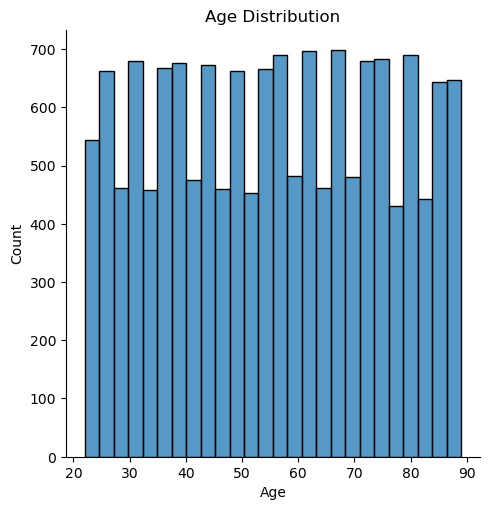

In [248]:
plt.figure(figsize=(15,8))
sns.displot(data_cust['Age'])
plt.title("Age Distribution")
plt.show()

#### Age Distribution across Continents

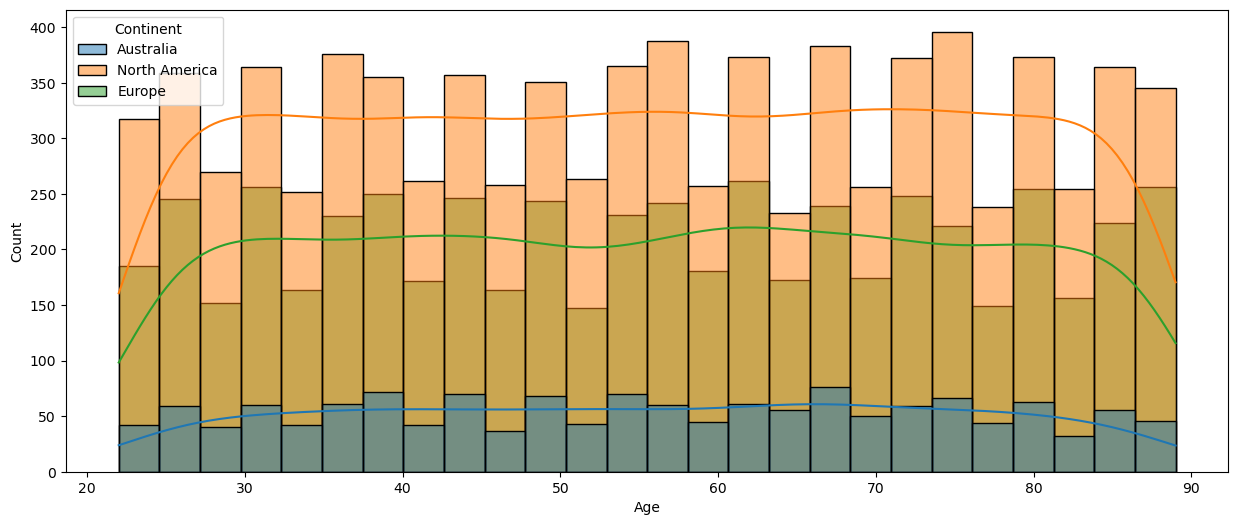

In [339]:
plt.figure(figsize=(15,6))
sns.histplot(data = data_cust, x = 'Age', hue = 'Continent', kde = True)
plt.show()

#### Gender Distribution by Countries

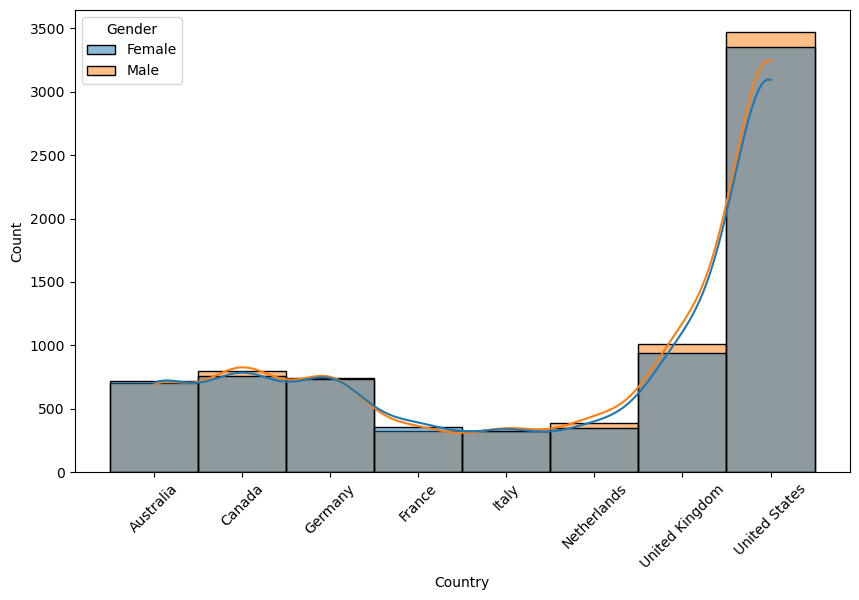

In [341]:
plt.figure(figsize=(10,6))
sns.histplot(data = data_cust, x = 'Country', hue = 'Gender', kde = True)
plt.xticks(rotation=45)
plt.show()

#### Age Distribution by Gender

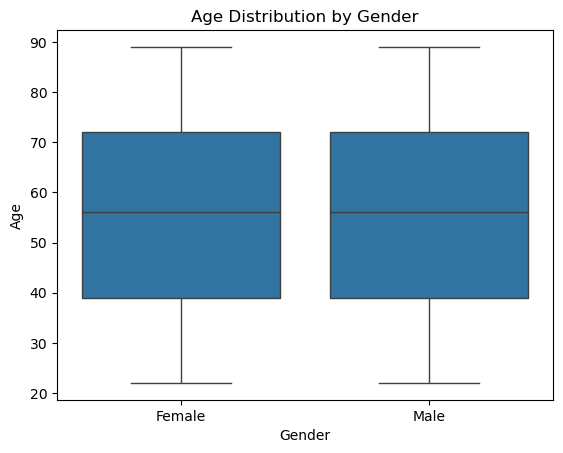

In [20]:
sns.boxplot(x='Gender', y='Age', data=data_cust)
plt.title('Age Distribution by Gender')
plt.show()

## 9. Multivariate Analysis

**9.1 Categorical attributes Distribution**

In [271]:
data_cust['Gender'].value_counts()

Gender
Male      7748
Female    7518
Name: count, dtype: int64

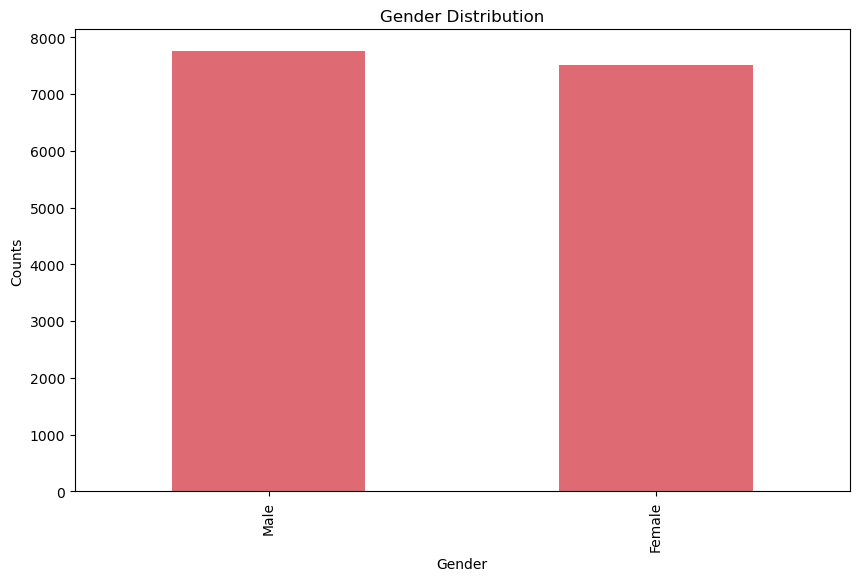

In [299]:
data_cust['Gender'].value_counts().plot(kind = 'bar', figsize=(10,6), color='#de6a73')
plt.title("Gender Distribution")
plt.ylabel("Counts")
plt.show()

In [273]:
data_cust['Country'].value_counts()

Country
United States     6828
United Kingdom    1944
Canada            1553
Germany           1473
Australia         1420
Netherlands        733
France             670
Italy              645
Name: count, dtype: int64

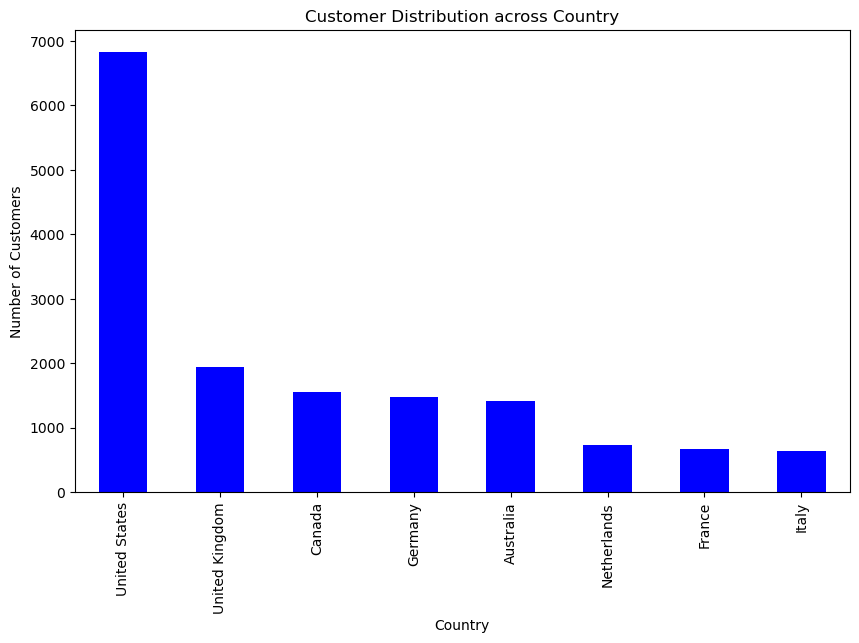

In [301]:
data_cust['Country'].value_counts().plot(kind = 'bar', figsize=(10,6), color='blue')
plt.title("Customer Distribution across Country")
plt.ylabel("Number of Customers")
plt.show()

In [275]:
data_cust['Continent'].value_counts()

Continent
North America    8381
Europe           5465
Australia        1420
Name: count, dtype: int64

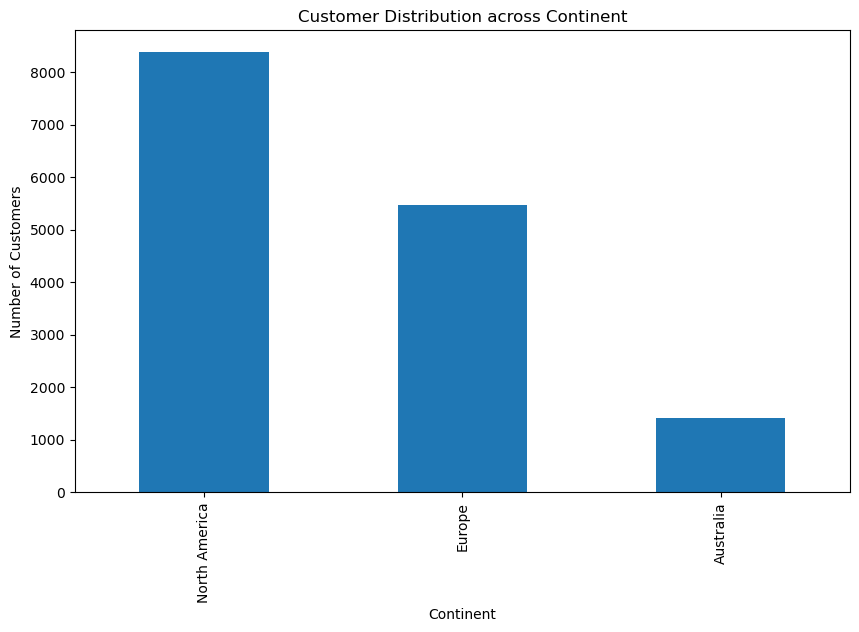

In [287]:
data_cust['Continent'].value_counts().plot(kind = 'bar', figsize=(10,6))
plt.title("Customer Distribution across Continent")
plt.ylabel("Number of Customers")
plt.show()

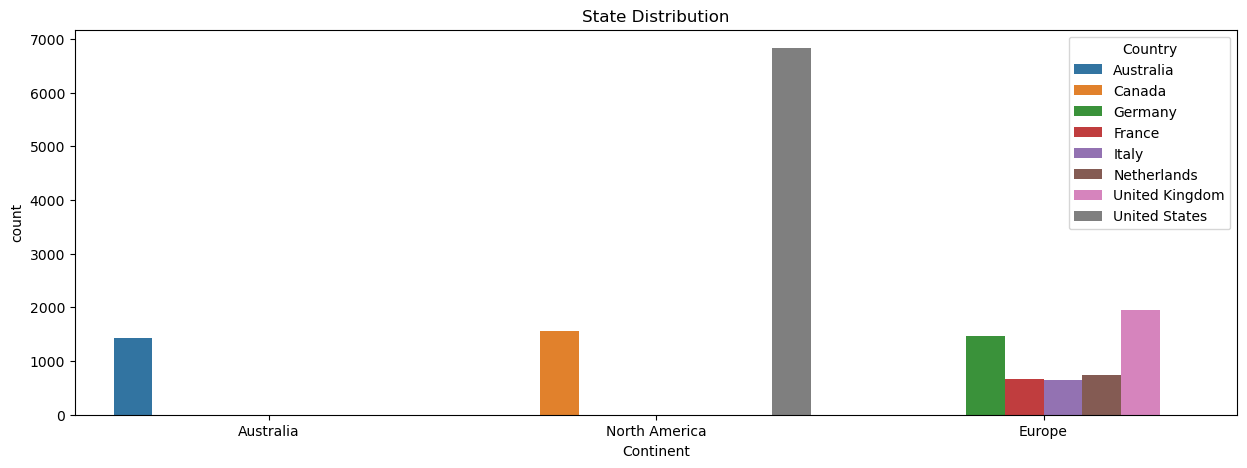

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x='Continent', hue='Country', data=data_cust)
plt.title('State Distribution')
plt.show()

## Overview from Sales Dataset

In [22]:
data_sale.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [23]:
data_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [24]:
data_sale.shape

(62884, 9)

In [25]:
data_sale.describe()

,Order Number,Line Item,CustomerKey,StoreKey,ProductKey,Quantity
count,6.288400e+04,62884.000000,6.288400e+04,62884.000000,62884.000000,62884.000000
mean,1.430905e+06,2.164207,1.180797e+06,31.802144,1125.859344,3.144790
std,4.532963e+05,1.365170,5.859634e+05,22.978188,709.244010,2.256371
min,3.660000e+05,1.000000,3.010000e+02,0.000000,1.000000,1.000000
25%,1.121017e+06,1.000000,6.808580e+05,8.000000,437.000000,1.000000
50%,1.498016e+06,2.000000,1.261200e+06,37.000000,1358.000000,2.000000
75%,1.788010e+06,3.000000,1.686496e+06,53.000000,1650.000000,4.000000
max,2.243032e+06,7.000000,2.099937e+06,66.000000,2517.000000,10.000000


In [26]:
data_sale.describe(include = 'object')

,Order Date,Delivery Date,Currency Code
count,62884,13165,62884
unique,1641,1492,5
top,12/21/2019,1/6/2020,USD
freq,222,50,33767


In [397]:
data_sale.isnull().sum()

Order Number     0
Line Item        0
Order Date       0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64

In [395]:
data_sale.drop(['Delivery Date'], axis=1, inplace=True)

In [399]:
data_sale['Order Date'] = pd.to_datetime(data_sale['Order Date'])

In [401]:
data_sale['Month'] = data_sale['Order Date'].dt.to_period('M')
data_sale['Year'] = data_sale['Order Date'].dt.to_period('Y')

In [403]:
data_sale['Month'] 

0        2016-01
1        2016-01
2        2016-01
3        2016-01
4        2016-01
          ...   
62879    2021-02
62880    2021-02
62881    2021-02
62882    2021-02
62883    2021-02
Name: Month, Length: 62884, dtype: period[M]

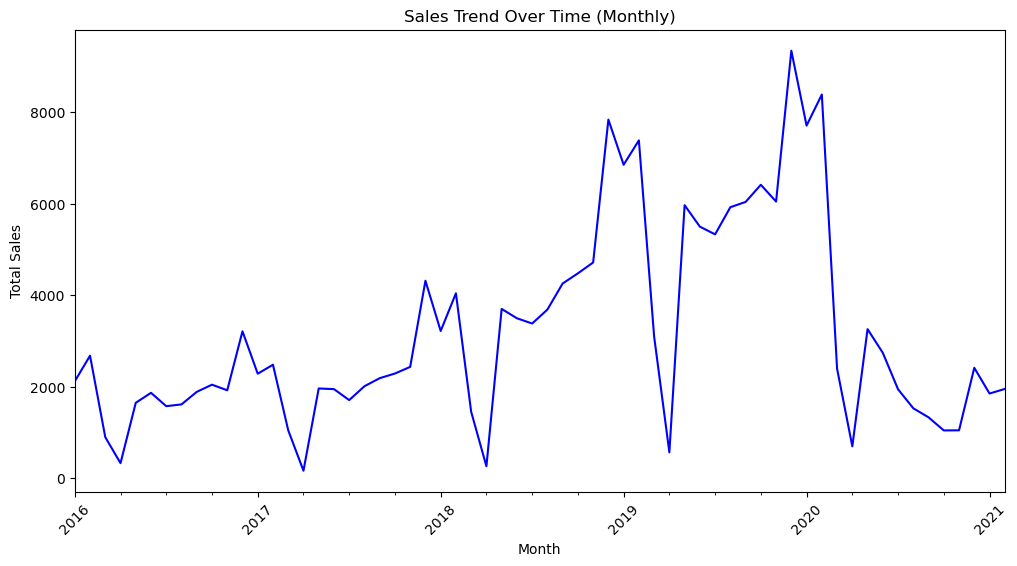

In [405]:
month_sales = data_sale.groupby('Month')['Quantity'].sum()

plt.figure(figsize=(12, 6))
month_sales.plot(kind='line', color='blue')
plt.title('Sales Trend Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

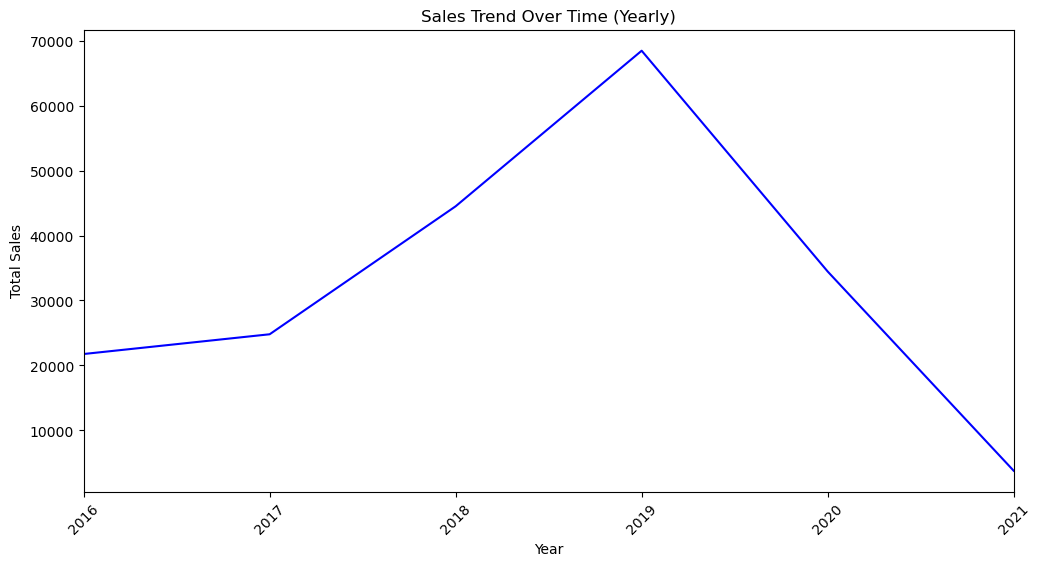

In [32]:
year_sales = data_sale.groupby('Year')['Quantity'].sum()
plt.figure(figsize=(12, 6))
year_sales.plot(kind='line', color='blue')
plt.title('Sales Trend Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

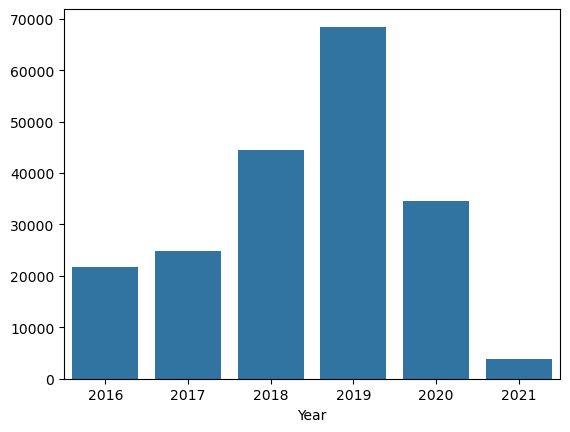

In [33]:
sns.barplot(x=year_sales.index, y=year_sales.values)
plt.show()

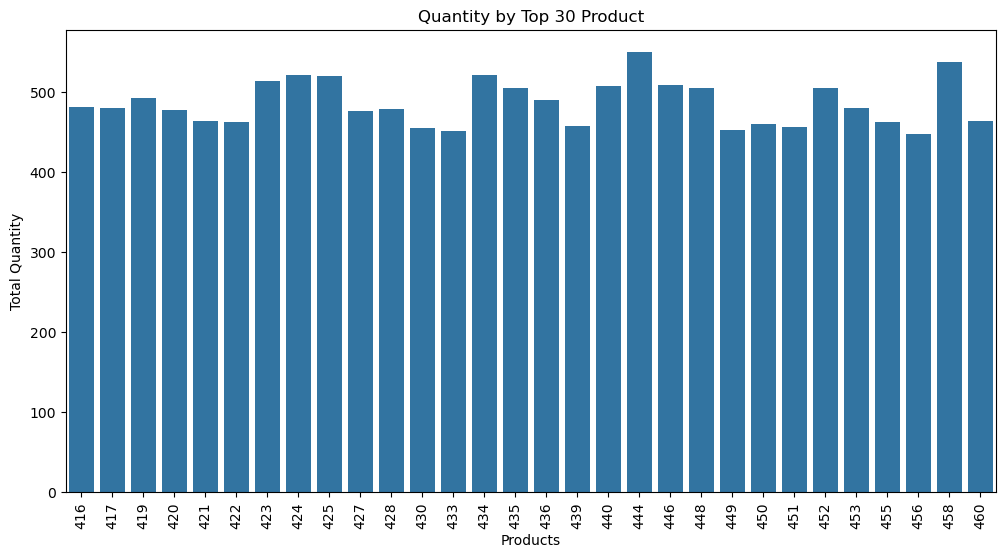

In [34]:
sales_by_product = data_sale.groupby('ProductKey')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_product.index[:30], y=sales_by_product.values[:30])
plt.title('Quantity by Top 30 Product')
plt.xlabel('Products')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)
plt.show()

## Overview of Store dataset

In [36]:
data_store.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015


In [37]:
data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [38]:
data_store.describe()

,StoreKey,Square Meters
count,67.000000,66.000000
mean,33.000000,1402.196970
std,19.485037,576.404058
min,0.000000,245.000000
25%,16.500000,1108.750000
50%,33.000000,1347.500000
75%,49.500000,2000.000000
max,66.000000,2105.000000


In [39]:
data_store.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [40]:
data_store['Square Meters'].fillna(0, inplace=True)

C:\Users\moort\AppData\Local\Temp\ipykernel_10624\1981071530.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_store['Square Meters'].fillna(0, inplace=True)


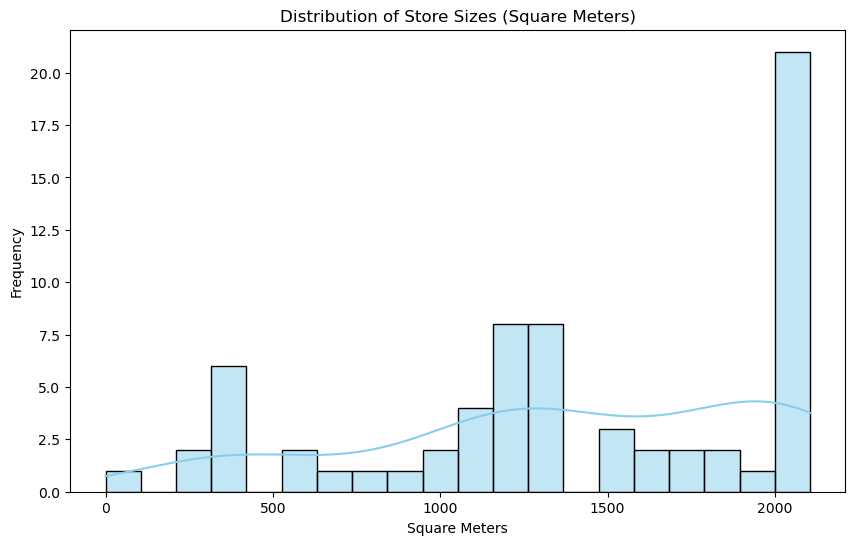

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data_store['Square Meters'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Store Sizes (Square Meters)')
plt.xlabel('Square Meters')
plt.ylabel('Frequency')
plt.show()

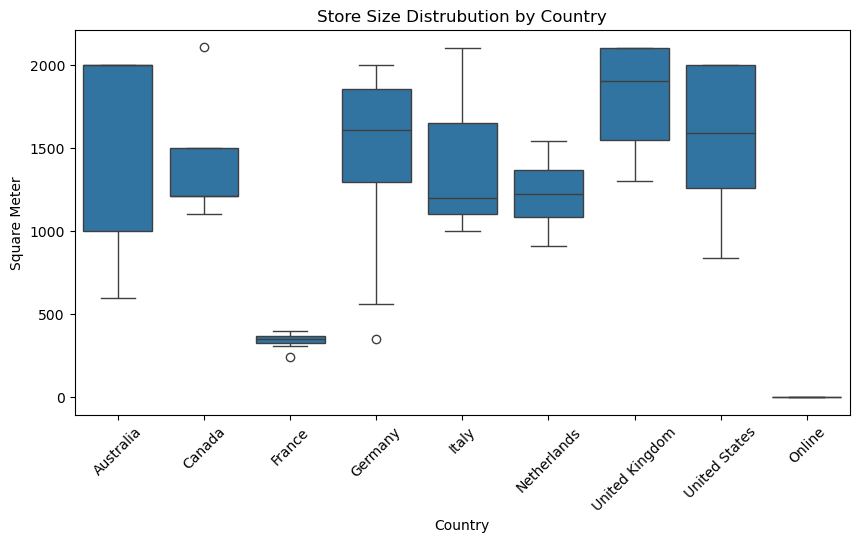

In [42]:
plt.figure(figsize= (10,5))
sns.boxplot(x = 'Country', y = 'Square Meters', data = data_store)
plt.title("Store Size Distrubution by Country")
plt.xlabel("Country")
plt.ylabel("Square Meter")
plt.xticks(rotation = 45)
plt.show()

<Axes: xlabel='Square Meters'>

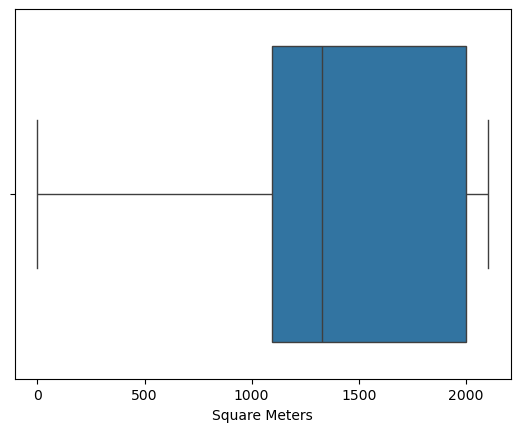

In [43]:
sns.boxplot(x = data_store['Square Meters'])

In [44]:
data_store['Open Date'] = pd.to_datetime(data_store['Open Date'],  format='%m/%d/%Y')
data_store['Open Year'] = data_store['Open Date'].dt.year
data_store['Open Year'] 

0     2008
1     2008
2     2012
3     2010
4     2015
      ... 
62    2008
63    2010
64    2012
65    2014
66    2010
Name: Open Year, Length: 67, dtype: int32

<Axes: xlabel='Open Year', ylabel='StoreKey'>

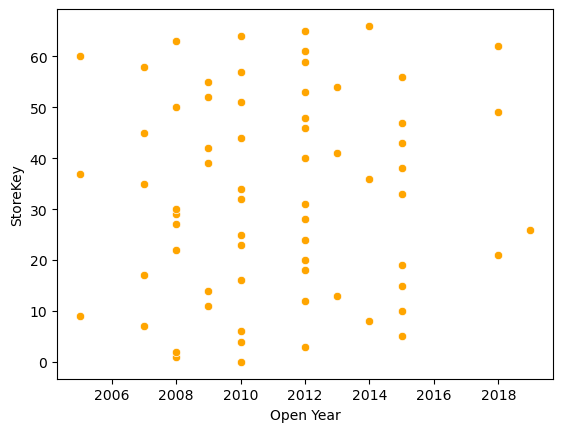

In [45]:
sns.scatterplot(x=data_store['Open Year'], y=data_store['StoreKey'], color='orange')

## Overview of Product Dataset

In [385]:
data_prod.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [387]:
data_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [389]:
data_prod.shape

(2517, 10)

In [391]:
data_prod.columns

Index(['ProductKey', 'Product Name', 'Brand', 'Color', 'Unit Cost USD',
       'Unit Price USD', 'SubcategoryKey', 'Subcategory', 'CategoryKey',
       'Category'],
      dtype='object')

In [393]:
data_prod.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [423]:
data_prod['Unit Cost USD'] = data_prod['Unit Cost USD'].apply(lambda x: x.replace("$",'').strip() if "$" in x else x)
data_prod['Unit Cost USD'] = data_prod['Unit Cost USD'].apply(lambda x: x.replace(",",'').strip() if "," in x else x)

In [425]:
data_prod['Unit Price USD'] = data_prod['Unit Price USD'].apply(lambda x: x.replace(",",'').strip() if "," in x else x)

In [427]:
data_prod['Unit Price USD']

0        12.99
1        12.99
2        14.52
3        21.57
4        21.57
         ...  
2512    129.99
2513    129.99
2514      3.35
2515      3.35
2516      3.35
Name: Unit Price USD, Length: 2517, dtype: object

In [429]:
data_prod[['Unit Cost USD', 'Unit Price USD']] = data_prod[['Unit Cost USD', 'Unit Price USD']].astype(float)

## Univariate Analysis

## measure of central tendancy

In [431]:
data_prod.describe()

,ProductKey,Unit Cost USD,Unit Price USD,SubcategoryKey,CategoryKey
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,1259.000000,147.655562,356.830131,491.810091,4.878824
std,726.739637,184.373683,494.054962,229.887134,2.299170
min,1.000000,0.480000,0.950000,101.000000,1.000000
25%,630.000000,32.250000,69.000000,305.000000,3.000000
50%,1259.000000,86.670000,199.990000,406.000000,4.000000
75%,1888.000000,183.950000,410.000000,801.000000,8.000000
max,2517.000000,1060.220000,3199.990000,808.000000,8.000000


In [433]:
data_prod.describe(include='object')

,Product Name,Brand,Color,Subcategory,Category
count,2517,2517,2517,2517,2517
unique,2517,11,16,32,8
top,Contoso 512MB MP3 Player E51 Silver,Contoso,Black,Computers Accessories,Home Appliances
freq,1,710,602,201,661


#### Measure of shape
**Skewness**

In [441]:
data_prod['Unit Cost USD'].skew()

2.6216153491891747

In [443]:
data_prod['Unit Price USD'].skew()

3.0493238720273927

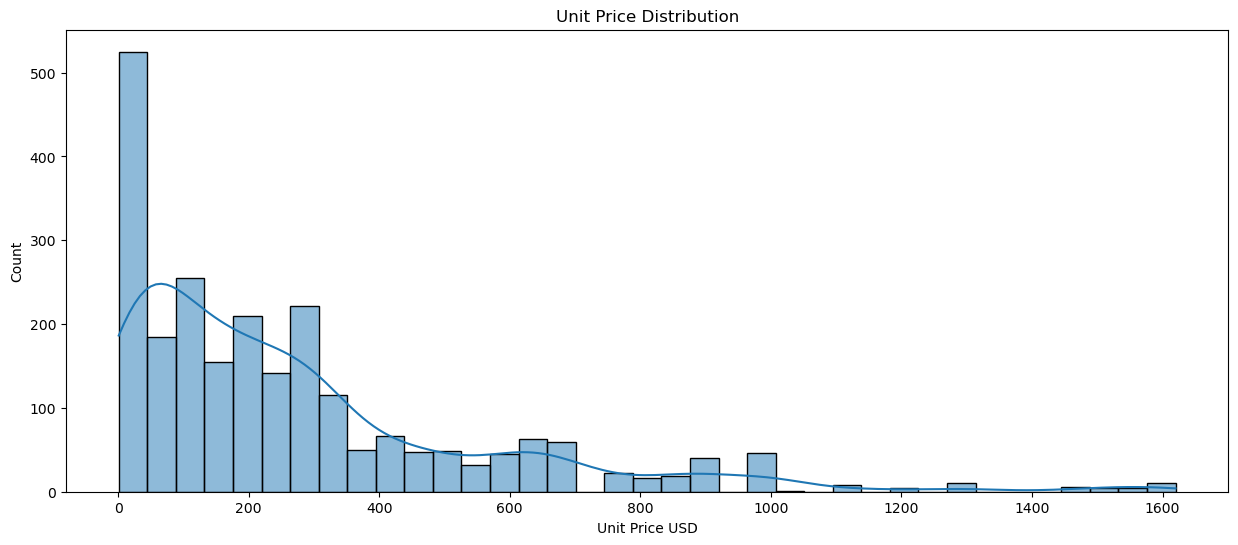

In [532]:
plt.figure(figsize=(15,6))
sns.histplot(data_prod['Unit Price USD'], kde=True)
plt.title("Unit Price Distribution")
plt.show()

In [469]:
corr_coeff = data_prod['Unit Price USD'].corr(data_prod['Unit Cost USD'])
print("Correlation Coefficient : {:.3f}".format(corr_coeff))

Correlation Coefficient : 0.977


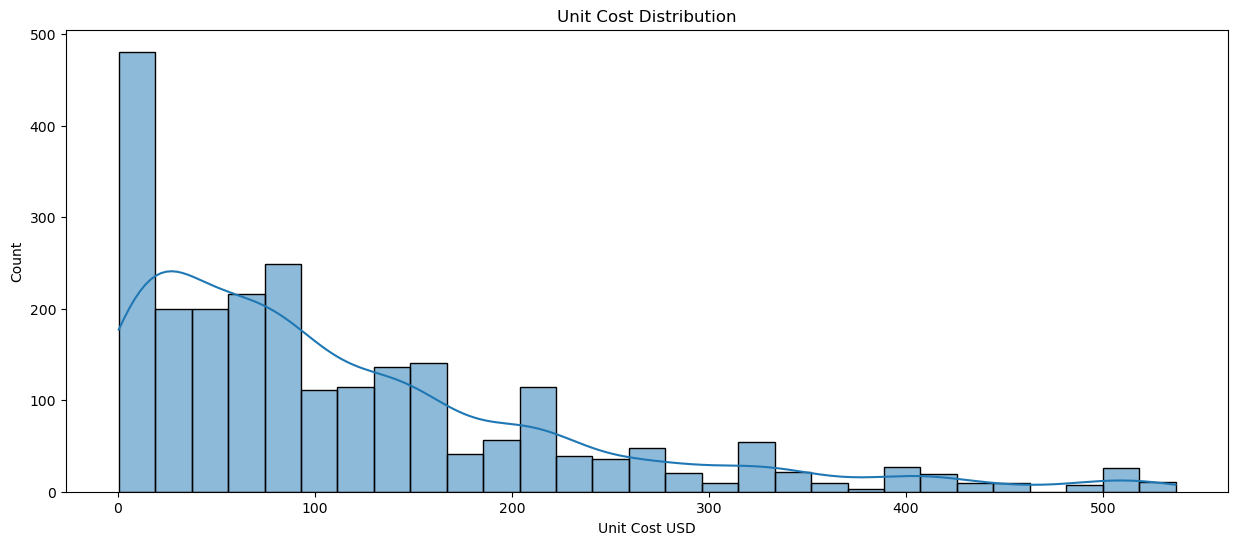

In [536]:
plt.figure(figsize=(15,6))
sns.histplot(data_prod['Unit Cost USD'], kde=True)
plt.title("Unit Cost Distribution")
plt.show()

<Axes: ylabel='Category'>

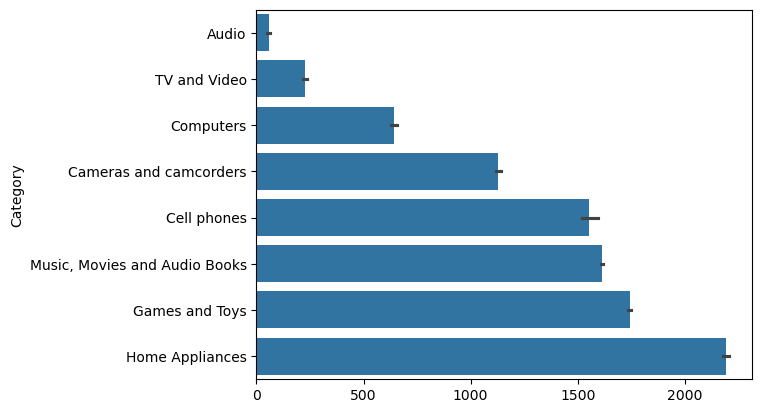

In [520]:
sns.barplot(data_prod['Category'])

<Axes: ylabel='Subcategory'>

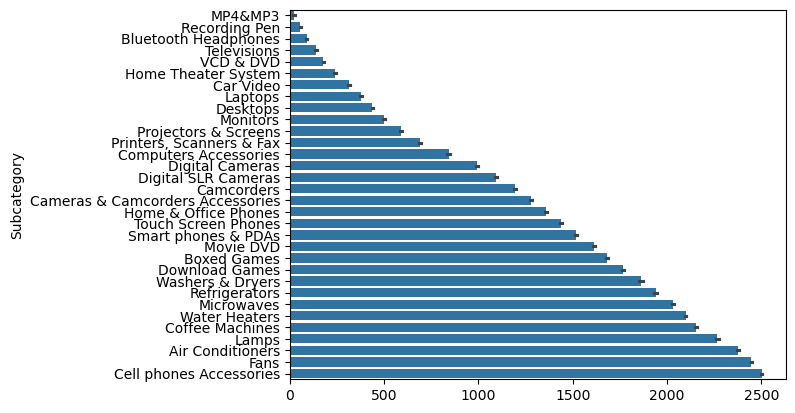

In [528]:
sns.barplot(data_prod['Subcategory'])

## Bivariate Analysis

<Axes: ylabel='Unit Price USD'>

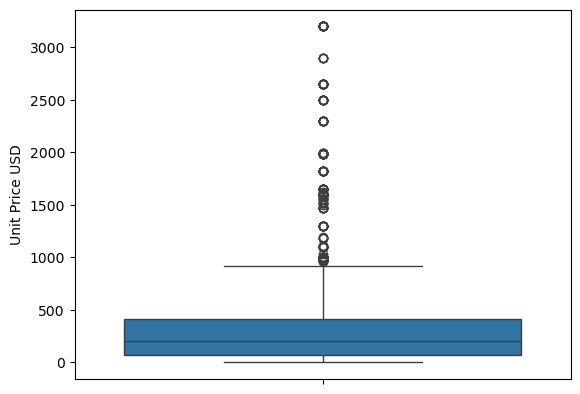

In [480]:
sns.boxplot(data_prod['Unit Price USD'])

<Axes: ylabel='Unit Cost USD'>

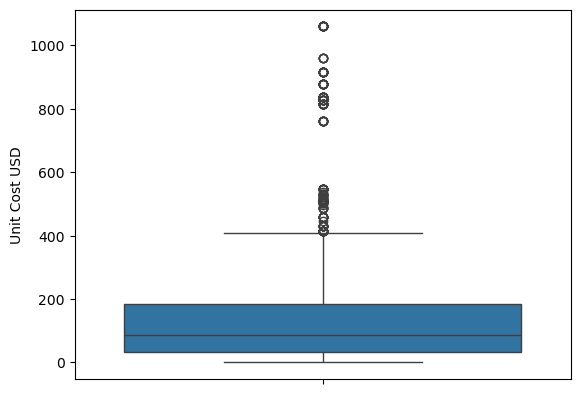

In [483]:
sns.boxplot(data_prod['Unit Cost USD'])

* Outliers are present in Unit Price and Unit Cost
* Possible to remove the outliers using Z-Score method and IQR method

In [544]:
z_score = np.abs((data_prod['Unit Price USD'] - data_prod['Unit Price USD'].mean())/(data_prod['Unit Price USD'].std()))
data_prod_2 = data_prod[z_score < 3]

In [542]:
z_score_1 = np.abs((data_prod['Unit Cost USD'] - data_prod['Unit Cost USD'].mean())/(data_prod['Unit Cost USD'].std()))
data_prod_1 = data_prod[z_score_1 < 3]

In [510]:
data_prod.shape

(2413, 10)

In [530]:
corr_coeff = data_prod['Unit Price USD'].corr(data_prod['Unit Cost USD'])
print("Correlation Coefficient : {:.3f}".format(corr_coeff))

Correlation Coefficient : 0.971


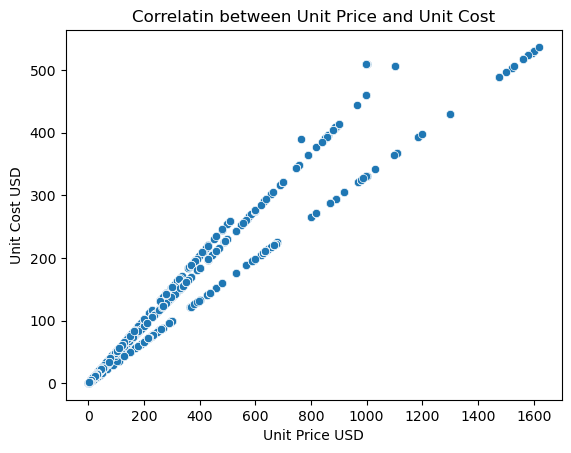

In [512]:
sns.scatterplot(x = data_prod['Unit Price USD'], y = data_prod['Unit Cost USD'])
plt.title("Correlatin between Unit Price and Unit Cost")
plt.show()

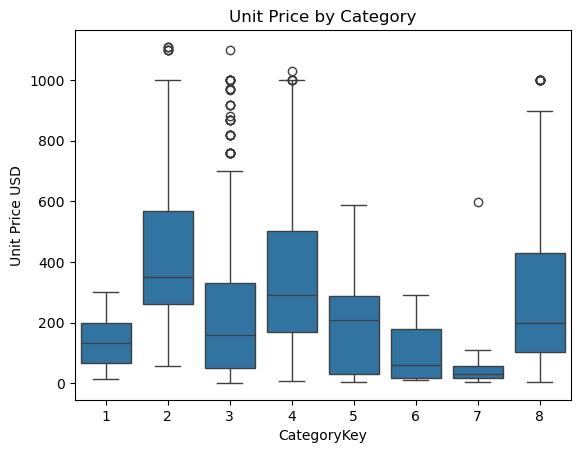

In [548]:
sns.boxplot(x='CategoryKey', y='Unit Price USD', data=data_prod_2)
plt.title('Unit Price by Category')
plt.show()

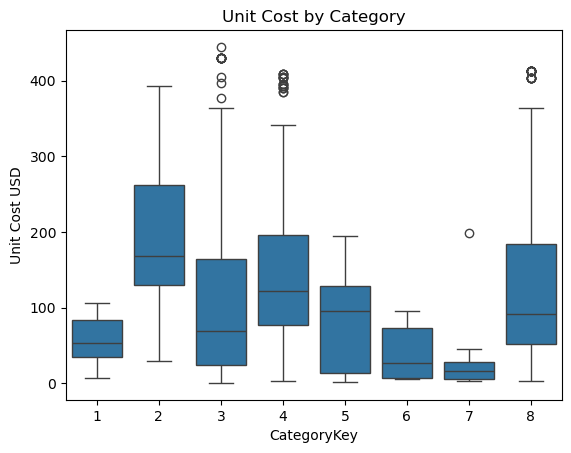

In [552]:
sns.boxplot(x='CategoryKey', y='Unit Cost USD', data=data_prod_1)
plt.title('Unit Cost by Category')
plt.show()

## Conclusions

### **Insights from Customer dataset**
* **Age Distribution across Continents:**
    - Customer's Age is between 35 to 75 on both gender.
      
* **Gender ratios in various regions:**
    - Cutomer from both ender and equally distributed across countries.
* **Geographic patterns:**
    - This data indiactes that more number of countries from Europe Continent has customer rather than other two continents.
    - United States has higher number of customers
* **Purchase patterns and preference:**

### **Insights from Sales dataset**
* **Seasonal Trends:**
    -Sales peak during December and January Months, with a significant decline in march and April months.

### **Insights from Product dataset**
* **Cost Performance:**
    - Unit Price and Unit Cost are positively correlated.


